---
# Exercício de regressão linear (publicidade dataset)
---
**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**

## Introdução


### Treinamento supervisionado
#### Problema de regressão, pois a variável dependente, valor total de vendas, é uma variável CONTÍNUA.

**Introdução:**  
Dados de publicidade de 200 filiais de uma determinada empresa.   
Cada linha representa os gastos de uma determinada filial em milhares de dólares com TV, Rádio e jornal e o total de vendas (em milhares de unidades).   
 
   
**Objetivo do caderno:**  
Criar modelo de regressão linear para prever o total de itens vendidos, com base na publicidade em TV, rádio e jornais.  
  
**Fonte de dados:**  
Advertising.csv  
http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'   (Link desativado...)   
Link alternativo:   
"!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SeHggoq__tUYdoZ-wYbr11yDmEgrkqAJ' -O Advertising.csv"   
Esses dados fornecem as vendas de um produto (em milhares de unidades) com orçamentos de publicidade (em milhares de
dólares) de TV, rádio e jornal.     
Existem 200 observações (representadas pelas linhas) e cada observação é um mercado único.  
  
Autor:  Fernando Melo  
Data:  05/11/2021


## Carregar bibliotecas de código

In [1]:
# Carregar bibliotecas que serão utilizadas: (pandas, sklearn, metrics,train_test_split, numpy)
import pandas as pd

# importa o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# biblioteca para gráficos (seaborn)


# permitir que gráficos possam ser impressos dentro do caderno jupyter.
%matplotlib inline


## Análise exploratória do dados

In [2]:
# Baixar o arquivo da web
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SeHggoq__tUYdoZ-wYbr11yDmEgrkqAJ' -O Advertising.csv

In [3]:
# Ler arquivo baixado acima : arquivo='Advertising.csv' (usar a coluna '0' como índice)
df_ads = pd.read_csv('Advertising.csv', index_col='Unnamed: 0')
# Mostrar dimensões e primeiras linhas do dataset
print(df_ads.shape)
df_ads.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Mostrar dimensões e últimas linhas do dataset
print(df_ads.shape)
df_ads.tail()

(200, 4)


,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# Mostra estatística básica das 'features' (comando describe)
df_ads.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


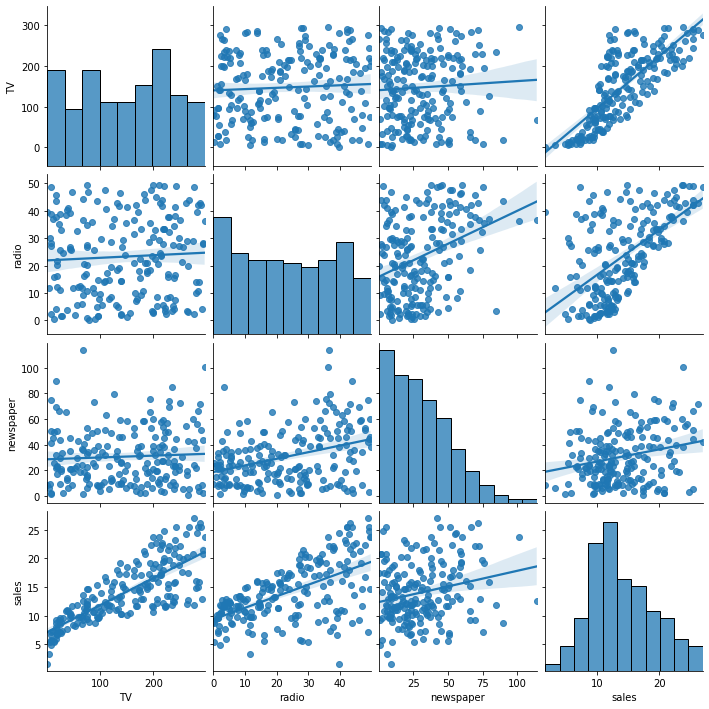

In [6]:
# Apresentar gráfico (sns pair plot) mostrando as relações entre as variáveis independentes e a dependente (vendas) - (kind='reg').
import seaborn as sns
sns.pairplot(df_ads, kind='reg');

## Preparação dos dados


O scikit-learn espera que X (matriz de 'features') e y (vetor de resposta) sejam matrizes NumPy.
No entanto, o Pandas é construído sobre o NumPy.
Assim, X pode ser um Pandas DataFrame e y pode ser uma série do Pandas.

In [7]:
# atribui os valores das variáveis independentes a 'X'
# cria uma lista contendo nomes das features
feature_cols = df_ads.iloc[:,0:3].columns
# usa a lista e atribui a X um subset do dataframe
X = df_ads[feature_cols]
y = df_ads['sales']
# select a Series from the DataFrame
X.TV

# Mostrar as dimensões de X e y (shape)
print('Dimensões X:', X.shape)
print('Dimensões y:', y.shape)

Dimensões X: (200, 3)
Dimensões y: (200,)


In [8]:
# Divide o dataset em treino e teste (incluir random_state para garantir reprodutibilidade)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train

,TV,radio,newspaper
80,116.0,7.7,23.1
198,177.0,9.3,6.4
39,43.1,26.7,35.1
25,62.3,12.6,18.3
123,224.0,2.4,15.6
...,...,...,...
107,25.0,11.0,29.7
15,204.1,32.9,46.0
93,217.7,33.5,59.0
180,165.6,10.0,17.6


In [9]:
# Confere as dimensões de X e y, de treino e teste
print('Dimensões X_train:', X_train.shape)
print('Dimensões y_train:', y_train.shape)

Dimensões X_train: (160, 3)
Dimensões y_train: (160,)


## Treinar o modelo

In [10]:
# instancia modelo de regressão linear
model_lr = LinearRegression()

# treina o modelo (aprende os coeficientes)
model_lr.fit(X_train, y_train)

LinearRegression()

## Interpretação dos coeficientes

In [11]:
# Mostra valores de intercept e coeficientes
print(model_lr.intercept_)
print(model_lr.coef_)

2.979067338122629
[0.04472952 0.18919505 0.00276111]


In [12]:
# pair the feature names with the coefficients
list(zip(feature_cols, model_lr.coef_))

[('TV', 0.044729517468716326),
 ('radio', 0.18919505423437652),
 ('newspaper', 0.0027611143413671935)]

Como interpretamos o coeficiente de TV (0,0466)?

- Para uma determinada quantidade de gastos com anúncios em rádio e jornal,  US $ 1.000 adicionais gastos em anúncios de TV  resulta em um  aumento nas vendas de 46,6 itens.


## Testar o modelo (inferência)

In [13]:
# Fazer a predição para os dados do dataset de teste
y_pred = model_lr.predict(X_test)

In [14]:
# mostrar resultado da predição
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

## Avaliar qualidade do modelo


**RMSE (root mean squared error):** é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e as predições.  
Quanto menor, melhor.

In [15]:
import numpy as np
from  sklearn import metrics
# Cálculo do RMSE usando o scikit-learn
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse1)

1.78159966153345


Temos um total de 3 variáveis independentes (preditivas): TV, rádio e jornais.  
Será que todas são importantes para fazer a melhor predição do total de vendas?  
E se tirássemos a variável 'newspaper' ?


In [16]:
# cria uma lista contendo nomes das features, desta vez sem 'newspaper'
feature_cols2 = df_ads.iloc[:,0:2].columns
# usa a lista e atribui a X um subset do dataframe
X2 = df_ads[feature_cols2]
X2.head()

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [17]:
# seleciona a variável dependente e atribui à y (predição)
y2 = df_ads['sales']

# Divide o dataset em treino e teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)
X_train2.head()

,TV,radio
80,116.0,7.7
198,177.0,9.3
39,43.1,26.7
25,62.3,12.6
123,224.0,2.4


In [18]:
# treina o modelo (aprende os coeficientes)
model_lr2 = LinearRegression()

# treina o modelo (aprende os coeficientes)
model_lr2.fit(X_train2, y_train2)

LinearRegression()

In [19]:
# Fazer a predição para os dados do dataset de teste
y_pred2 = model_lr2.predict(X_test2)
y_pred2

array([16.35747252, 20.86299397, 21.52505848, 10.58719845, 22.22459614,
       13.06070499, 21.09564403,  7.47641062, 13.62409831, 15.15019438,
        9.12761147,  6.62878923, 14.16531076,  8.97073929,  9.66825463,
       12.12821691,  8.71252199, 16.30911498, 10.26684186, 18.89010391,
       19.4519532 , 13.03925601, 12.41182149, 21.20994137,  7.88771365,
        5.80255394, 20.7764401 , 12.02358305,  9.1784369 ,  8.59012258,
       12.46070487, 10.03213267, 21.34367738, 12.11632301, 18.23376459,
       20.22242395, 14.14999367, 20.78067544, 11.07322103,  4.56335118])

In [20]:
# Cálculo do RMSE usando o scikit-learn
rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
rmse2

1.7714254173033517

In [21]:
rmse1

1.78159966153345

## Fazer normalização dos dados

### Normalização dos dados
Uma das formas de normalizar as variáveis independentes, é removendo de cada coluna, a sua respectiva média e dividindo pelo seu respectivo desvio padrão.  
Se uma feature tem um intervalo de valores que é ordens de magnitude maior que as outras features, ela pode dominar a função objetivo e tornar o modelo incapaz de aprender com outras features corretamente como esperado.  
A Normalização de um conjunto de dados é um requisito comum para muitos algoritmos de aprendizado de máquina: eles podem se comportar mal se os recursos individuais não se parecerem mais ou menos com dados normalmente distribuídos padrão (por exemplo, Gaussiano com média 0 e variação unitária).   
Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [22]:
# Importa a biblioteca StandardScaler
from sklearn.preprocessing import StandardScaler

# Instancia objeto StandardScaler
scaler = StandardScaler()
X_train.head()

,TV,radio,newspaper
80,116.0,7.7,23.1
198,177.0,9.3,6.4
39,43.1,26.7,35.1
25,62.3,12.6,18.3
123,224.0,2.4,15.6


In [23]:
# Ajusta o scaler aos dados de treino
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_norm = scaler.transform(X_train)
X_train_norm

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

Treina modelo com dados normalizados

In [25]:
# treina o modelo (atenção: usar "scaler.transform" nos dados de treino)
model_lr3 = LinearRegression()
model_lr3.fit(X_train_norm, y_train)

LinearRegression()

In [26]:
# Fazer a predição para os dados de teste (atenção: usar "scaler.transform" no X_test)
y_pred3 = model_lr3.predict(scaler.transform(X_test))
# Cálculo do RMSE usando o scikit-learn
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
print(rmse3)
print(rmse2)
print(rmse1)

1.7815996615334508
1.7714254173033517
1.78159966153345


In [27]:
y_pred3

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

### A normalização dos dados melhorou o desempenho do modelo?


In [28]:
from autoML import AutoML
automl = AutoML(df_ads, 'sales')
automl.getResults()

,algorithm,features,n_features,train_time,mem_max,r2,neg_mean_absolute_error,neg_mean_squared_error
0,DecisionTreeRegressor,"(TV, radio)",2,2.937529,217.976562,0.884662,-1.395000,-3.266750
1,KNeighborsRegressor,"(TV, radio)",2,3.268398,217.906250,0.873454,-1.352000,-3.825060
2,LinearRegression,"(TV, radio)",2,4.267969,217.101562,0.801693,-1.733805,-5.583259
3,SVR,"(TV, radio)",2,2.946278,217.660156,0.721111,-1.874784,-8.234668
